# Calculate Radar Vegetation Index(RVI) using Sentinel-1 GRD collection

In this notebook, we want to study the health condition of vegetation using radar. Thus, we will use the Sentinel-1 GRD collection available within the Copernicus Data Space Ecosystem.  The Radar Vegetation Index (RVI) is a measure used in remote sensing and agriculture to assess the health and condition of vegetation using radar data. 

The RVI has been used in several previous research studies, especially for predicting the growth level of crop vegetation over time and many more. However, here, we will stick to a simple example of calculating RVI.

The formula adopted in this notebook is as follows:

$$\mathrm{RVI}=\frac{4 \sigma^0{ }_{V H}}{\sigma^0{ }_{V V}+\sigma^0{ }_{V H}}$$,

where $\sigma^0{ }_{V H},\sigma^0{ }_{V V}$ and $\sigma^0{ }_{V H}$ are the polarised backscattering coefficients,

Reference:
* https://www.mdpi.com/2076-3417/9/4/655
* https://forum.step.esa.int/t/creating-radar-vegetation-index/12444/18

In [1]:
import openeo
from openeo.processes import sqrt

In [3]:
connection = openeo.connect("openeo.dataspace.copernicus.eu/").authenticate_oidc()

Authenticated using refresh token.


## Load the collection

In [5]:
s1 = connection.load_collection(
    "SENTINEL1_GRD",
    temporal_extent=["2017-05-03", "2017-08-03"],
    spatial_extent={"west": 5.15, "south": 51.20, "east": 5.25, "north": 51.35},
    bands=["VV","VH"],
    
)

Given that the "gamma0-terrain" coefficient is not currently supported in the openEO backend implementation of the Copernicus Data Space Ecosystem at the time of preparing this notebook, we will use "sigma0-ellipsoid" coefficient for SAR backscattering computation.

In [6]:
s1 = s1.sar_backscatter(coefficient="sigma0-ellipsoid")

Let's apply the formula mentioned above:

In [7]:
rvi = (4 * (s1.band("VH"))) / (s1.band("VV") + s1.band("VH"))

In [8]:
job= rvi.execute_batch(title="RVI", outputfile="RVI.nc")

0:00:00 Job 'j-240123d6aa9c4a499731081cb58348fe': send 'start'
0:00:13 Job 'j-240123d6aa9c4a499731081cb58348fe': created (progress N/A)
0:00:18 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:00:24 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:00:32 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:00:42 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:00:55 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:01:10 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:01:32 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:01:56 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:02:26 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:03:03 Job 'j-240123d6aa9c4a499731081cb58348fe': running (progress N/A)
0:03:50 Job 'j-240123d6aa9c4a499731081cb58348fe': finished (progress N/A)


## Let's plot RVI result

In [9]:
import matplotlib.pyplot as plt
import xarray as xr

In [10]:
ds = xr.load_dataset("RVI.nc")

Text(0.5, 1.0, 'Median NDVI')

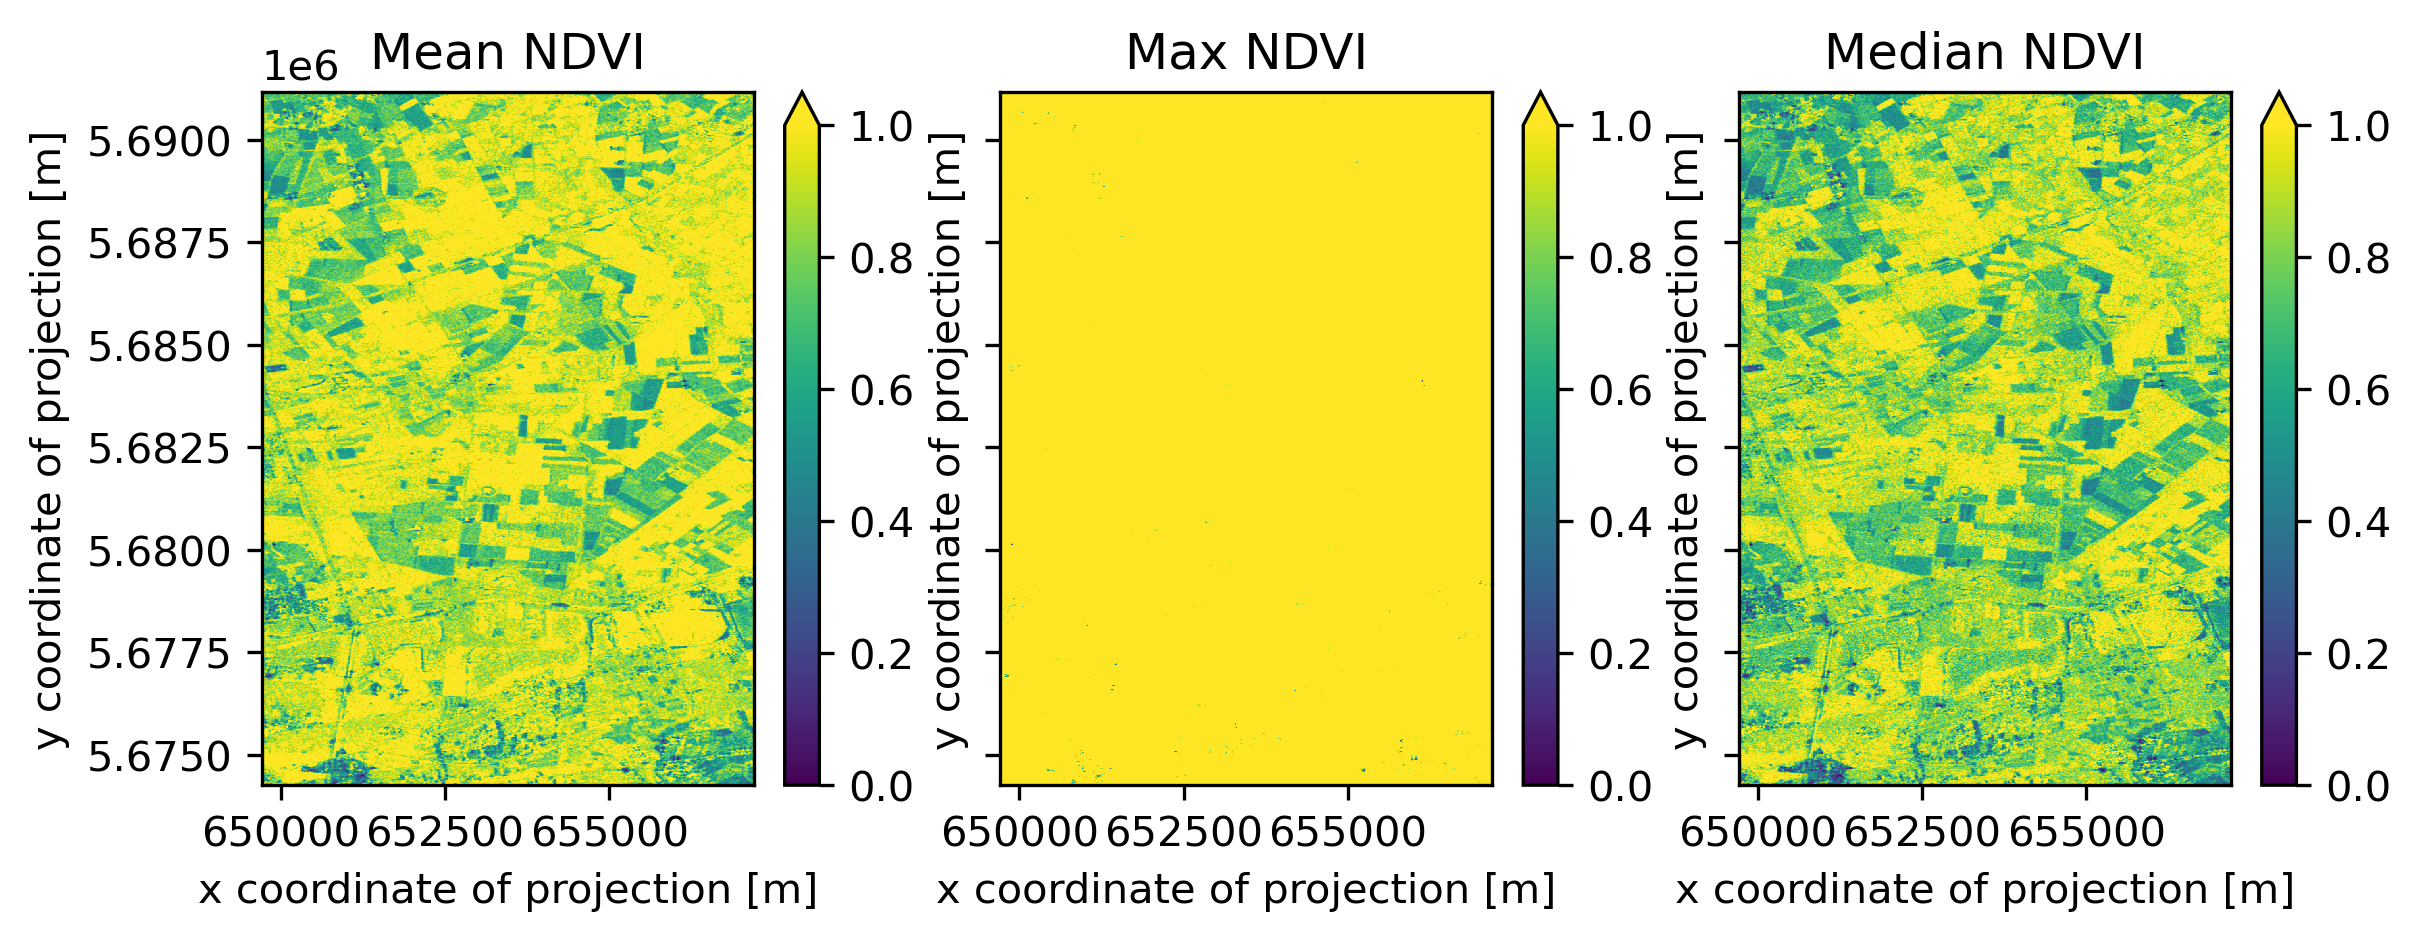

In [13]:
data = ds[["var"]].to_array(dim="bands")

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), dpi=300, sharey=True)
data.mean(dim='t')[0].plot.imshow(vmin=0, vmax=1, ax=axes[0])
axes[0].set_title('Mean NDVI')
data.max(dim='t')[0].plot.imshow(vmin=0, vmax=1, ax=axes[1])
axes[1].set_title('Max NDVI')
data.median(dim='t')[0].plot.imshow(vmin=0, vmax=1, ax=axes[2])
axes[2].set_title('Median NDVI')

Let us further visualise the mean timeseries NDVI for this area.

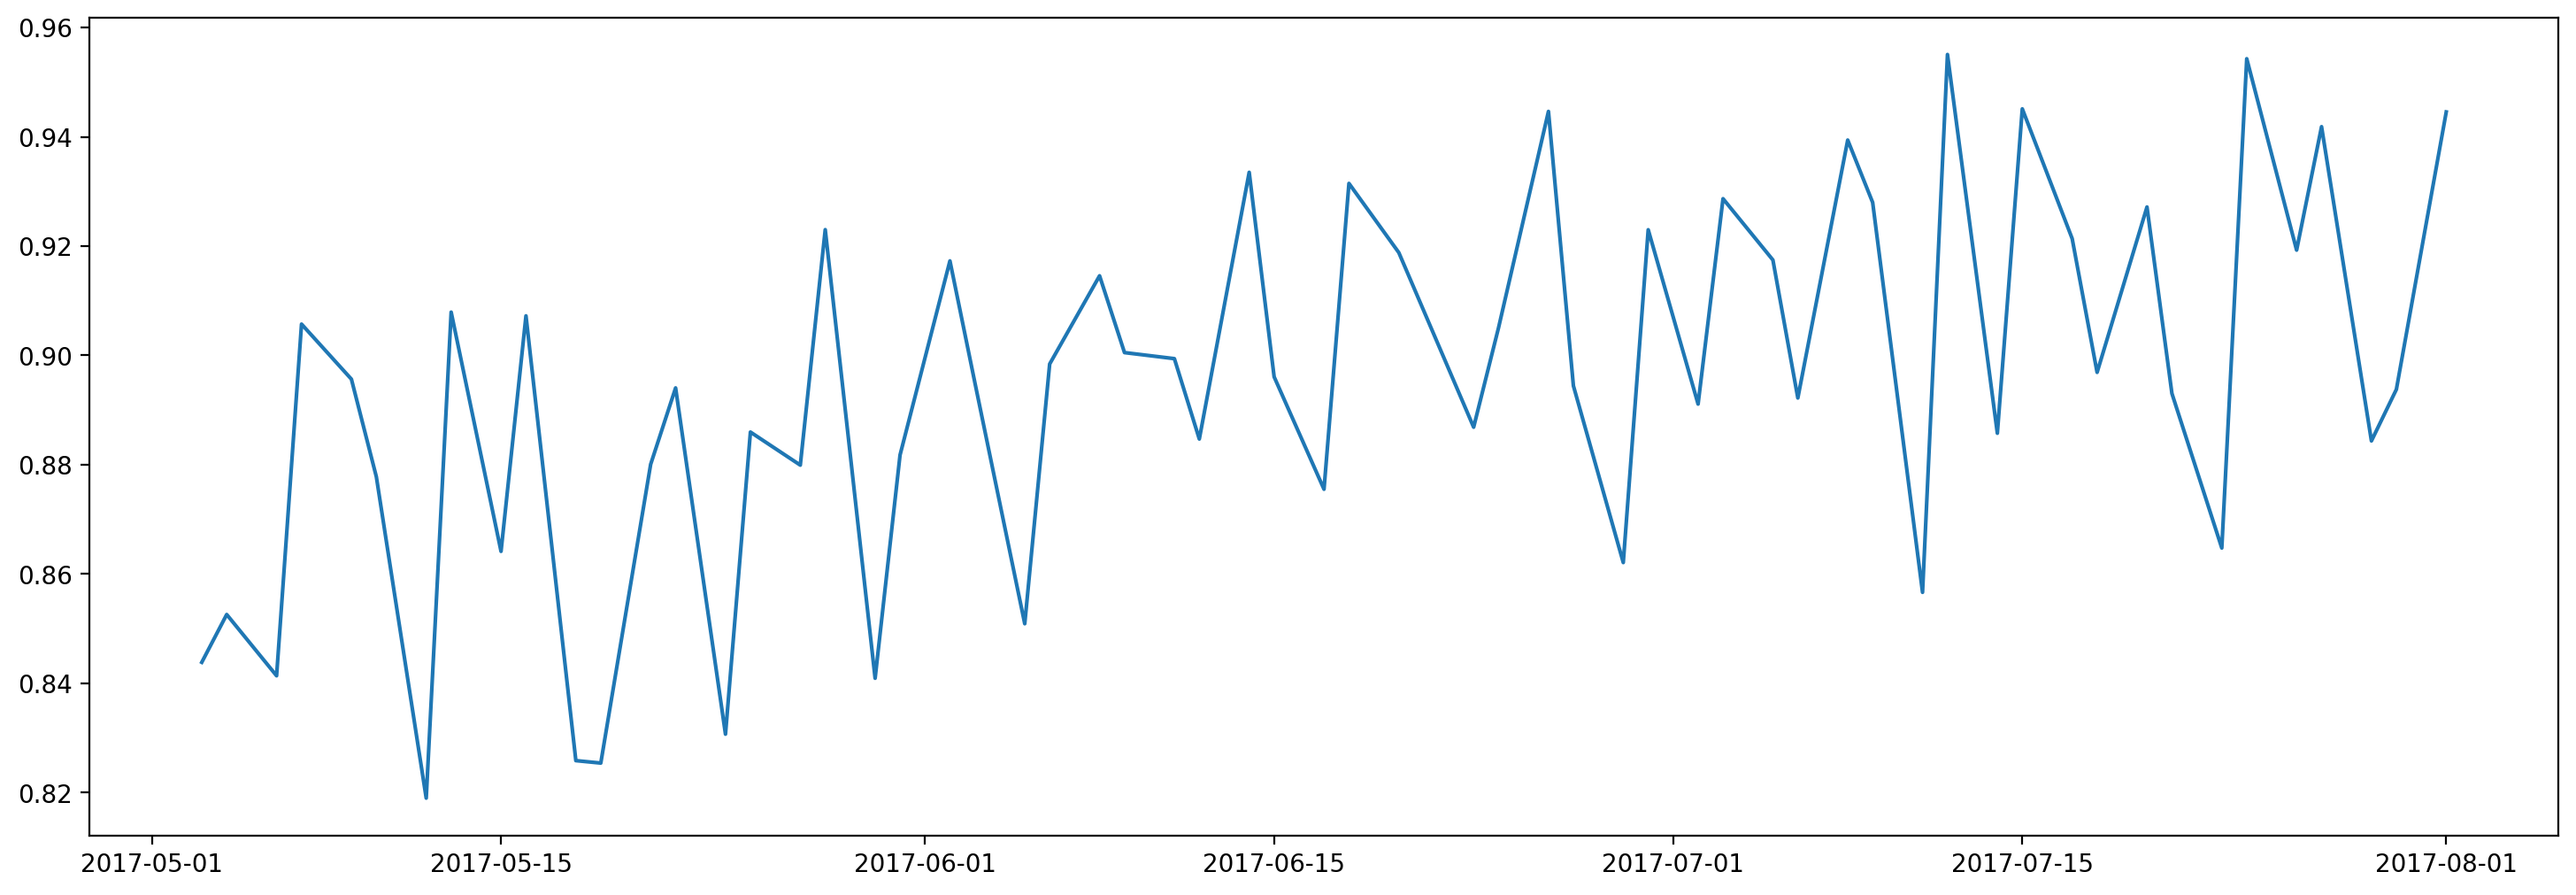

In [14]:
f, axarr = plt.subplots( dpi=200, figsize=(18, 6))
axarr.plot(data.t.to_numpy(),data.mean(dim=('x','y'))[0])

So, looking at the plot, it looks like the vegetation has increased over time.